For those (like me) who cant remember how to start the dbs - 

For mac - Open a terminal window and run brew services start mongodb-community@6.0.
To begin using MongoDB open a new terminal window and run mongosh.

For Windows - To start the MongoDB server open a new command line window and run "C:\Program Files\MongoDB\Server\6.0\bin\mongod.exe" --dbpath="c:\data\db".
To begin using MongoDB open a new command line window and run mongosh.exe, or run mongosh.

In [1]:
import pandas as pd
from pymongo import MongoClient
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

# connect to mdb
client = MongoClient("mongodb://localhost:27017/")


In [2]:
client = MongoClient("mongodb://localhost:27017/")  # Local MongoDB
db = client["trust_database"]  # Database name
collection = db["country_trust"]  # Collection name

In [3]:
#loading "cleaned_trust_rate.csv"
csv_file = "../Resources/cleaned_trust_rate.csv"
df = pd.read_csv(csv_file)

In [4]:
# converting numeric fields to floats and rounding to 2nd decimal
float_cols = [
    "neighbourhood", "government", "scientist",
    "journalist", "doctor_and_nurses", "philantropist", "traditional_healers"
]
df[float_cols] = df[float_cols].apply(pd.to_numeric, errors="coerce").round(2)

In [6]:
#converting df into a list of dictionaries
data = df.to_dict(orient="records")

#inserting into db
collection.insert_many(data)
print("Data inserted into MongoDB successfully!")

Data inserted into MongoDB successfully!


In [8]:
# Query the top 50 countries by population
top_50_countries = list(
    collection.find().sort("population", -1).limit(50)  # sorting by population descending
)


for country in top_50_countries:
    pprint(country)

{'_id': ObjectId('67903fa824c098bc2aa9cf6f'),
 'country': 'Israel',
 'doctor_and_nurses': 96.8,
 'government': 49.81,
 'journalist': 65.76,
 'neighbourhood': 76.72,
 'philantropist': 70.03,
 'scientist': 91.0,
 'traditional_healers': 59.57}
{'_id': ObjectId('67903fa824c098bc2aa9cf67'),
 'country': 'Guinea',
 'doctor_and_nurses': 56.42,
 'government': 35.14,
 'journalist': 58.51,
 'neighbourhood': 56.69,
 'philantropist': 54.88,
 'scientist': 51.27,
 'traditional_healers': 38.89}
{'_id': ObjectId('67903fa824c098bc2aa9cf57'),
 'country': 'Cyprus',
 'doctor_and_nurses': 87.08,
 'government': 49.85,
 'journalist': 53.95,
 'neighbourhood': 83.88,
 'philantropist': 76.19,
 'scientist': 82.5,
 'traditional_healers': 59.03}
{'_id': ObjectId('67903fa824c098bc2aa9cf5b'),
 'country': 'Ecuador',
 'doctor_and_nurses': 69.21,
 'government': 27.48,
 'journalist': 44.16,
 'neighbourhood': 53.89,
 'philantropist': 46.87,
 'scientist': 57.2,
 'traditional_healers': 13.89}
{'_id': ObjectId('67903fa824c09

In [9]:
# Fetch data for top 50 countries by population from MongoDB
cursor = collection.find().sort("population", -1).limit(50)
top_50_data = list(cursor)

# Convert the MongoDB documents to a Pandas DataFrame
import pandas as pd
df_top_50 = pd.DataFrame(top_50_data)

# Drop unnecessary fields (like MongoDB "_id")
df_top_50 = df_top_50.drop(columns=["_id"])

In an attempt to analyze correlations, i tried plotting the values for all columns using a pairwise dot plot thing..

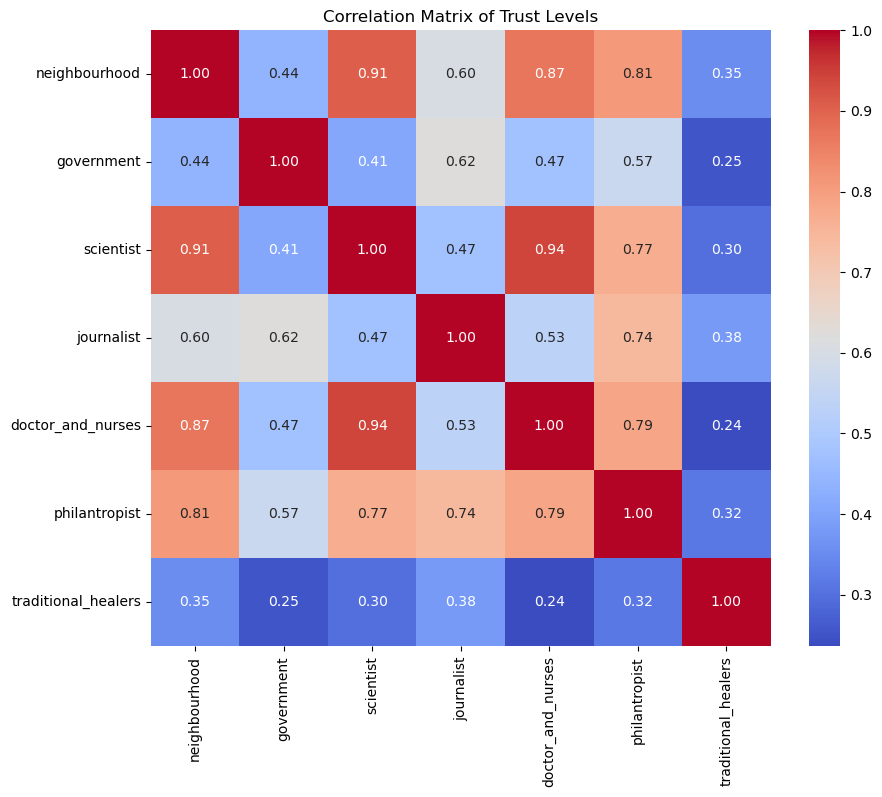

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_top_50[
    ["neighbourhood", "government", "scientist", 
     "journalist", "doctor_and_nurses", 
     "philantropist", "traditional_healers"]
].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Trust Levels")
plt.show()